# Coffee Shop Daily Revenue Prediction


## Problem
Coffee shop owners need to maximize their daily revenue by optimizing key operational factors such as customer volume, pricing strategy, marketing spend, staffing levels, and location foot traffic. However, understanding these variables' impact and accurately predicting revenue remains a challenge.

### Key Questions
How do different factors (customer count, marketing spend) affect daily revenue?
Can we develop a predictive model to forecast revenue based on operational inputs?
What are the key drivers of coffee shop revenue?


## Approach

### Data Exploration & Cleaning

In [75]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
df = pd.read_csv(r"C:\Users\Ivan\Downloads\coffee_shop_revenue.csv")
df

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42
...,...,...,...,...,...,...,...
1995,372,6.41,11,4,466.11,913,2816.85
1996,105,3.01,11,7,12.62,235,337.97
1997,89,5.28,16,9,376.64,310,951.34
1998,403,9.41,7,12,452.49,577,4266.21


In [28]:
# Display basic information
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB


,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,274.296000,6.261215,11.667000,7.947000,252.614160,534.893500,1917.325940
std,129.441933,2.175832,3.438608,3.742218,141.136004,271.662295,976.202746
min,50.000000,2.500000,6.000000,2.000000,10.120000,50.000000,-58.950000
25%,164.000000,4.410000,9.000000,5.000000,130.125000,302.000000,1140.085000
50%,275.000000,6.300000,12.000000,8.000000,250.995000,540.000000,1770.775000
75%,386.000000,8.120000,15.000000,11.000000,375.352500,767.000000,2530.455000
max,499.000000,10.000000,17.000000,14.000000,499.740000,999.000000,5114.600000


In [22]:
# Check for missing values
print(df.isnull().sum())

Number_of_Customers_Per_Day    0
Average_Order_Value            0
Operating_Hours_Per_Day        0
Number_of_Employees            0
Marketing_Spend_Per_Day        0
Location_Foot_Traffic          0
Daily_Revenue                  0
dtype: int64


In [24]:
# Check for duplicate values
print(df.duplicated().sum())
df = df.drop_duplicates()
df

0


,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42
...,...,...,...,...,...,...,...
1995,372,6.41,11,4,466.11,913,2816.85
1996,105,3.01,11,7,12.62,235,337.97
1997,89,5.28,16,9,376.64,310,951.34
1998,403,9.41,7,12,452.49,577,4266.21


### Exploratory Data Analysis (EDA)

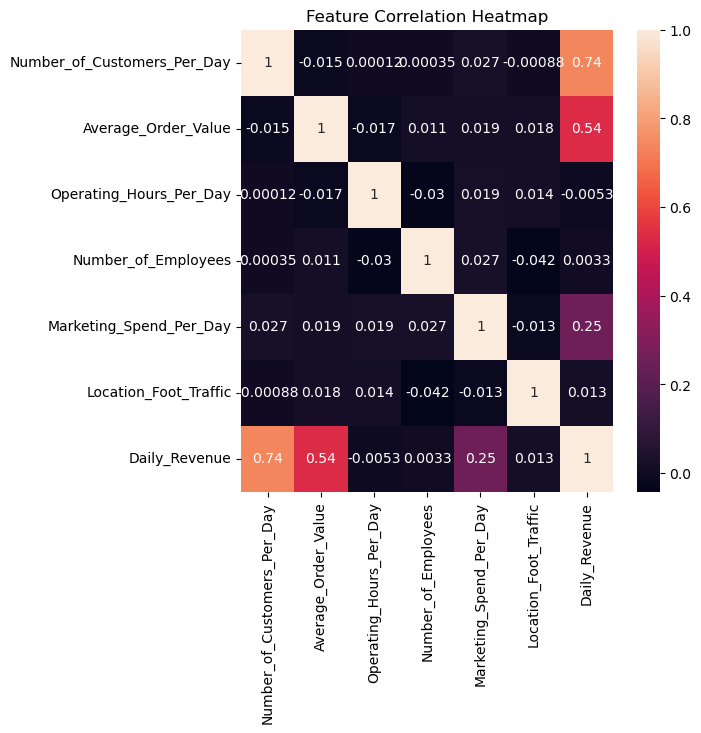

In [95]:
# Visualize correlation
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Pairplot to visualize relationships
sns.pairplot(df, diag_kind="kde")
plt.show()

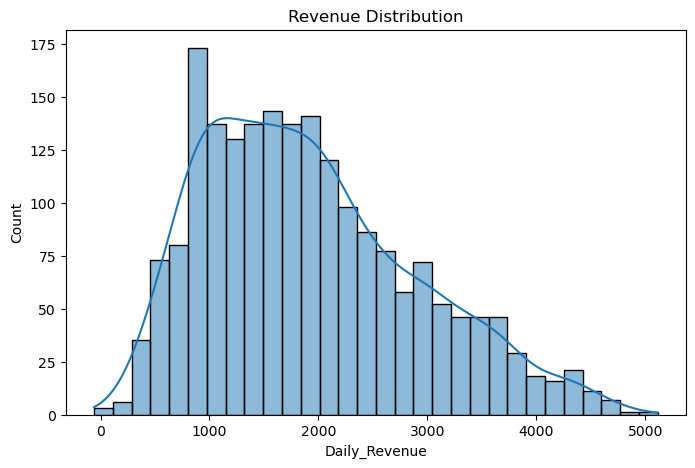

In [52]:
# Distribution of Daily Revenue
plt.figure(figsize=(8, 5))
sns.histplot(df["Daily_Revenue"], bins=30, kde=True)
plt.title("Revenue Distribution")
plt.show()

### Feature Selection & Model Training

In [67]:
# Define features (X) and target variable (y)
X = df.drop(columns=['Daily_Revenue']) # Drop target variable
y = df['Daily_Revenue']
X

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic
0,152,6.74,14,4,106.62,97
1,485,4.50,12,8,57.83,744
2,398,9.09,6,6,91.76,636
3,320,8.48,17,4,462.63,770
4,156,7.44,17,2,412.52,232
...,...,...,...,...,...,...
1995,372,6.41,11,4,466.11,913
1996,105,3.01,11,7,12.62,235
1997,89,5.28,16,9,376.64,310
1998,403,9.41,7,12,452.49,577


In [69]:
y

0       1547.81
1       2084.68
2       3118.39
3       2912.20
4       1663.42
         ...   
1995    2816.85
1996     337.97
1997     951.34
1998    4266.21
1999     914.24
Name: Daily_Revenue, Length: 2000, dtype: float64

In [71]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [73]:
# Normalize numerical features (optional but improves model performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [77]:
model = LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [81]:
# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred

array([1552.89976524, 2507.62006584, 2035.08126784, 1671.57952303,
       2126.62575716, 1772.83943471,  935.60537996,  851.83159286,
       3286.61754051, 1945.41874918, 1851.55937242, 1317.22077154,
       1517.14653167, 1171.76985624, 3055.22506945, 1018.25855664,
        709.2306775 , 2017.95274677, 1535.90412828,  213.54938393,
       1733.17640661, 2026.40314841, 2117.67302502, 1294.2910276 ,
       1894.54751196,  935.45459344,  140.86487872, 1060.2553502 ,
         41.0130086 , 3149.46801916, 1823.84409856, 3153.72720257,
        998.58161052, 1018.2368533 , 1272.07481729, 2637.13591659,
       1882.25825643, 2483.76335307, 2828.37601498,  790.64435833,
       1247.6784951 , 1699.40062146, 1311.88542502, 2168.53006921,
       1567.27157063, 1971.30607298, 3645.14847345,  807.5307667 ,
       3311.67909285,  808.54661445, 2168.58032812, 2269.64766667,
       4150.46935512,  109.63231138, 2252.94096884, 1363.77481259,
       2817.05371007, 2731.30834827, 1388.31487822, 2817.60930

In [83]:
# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 235.70
RMSE: 301.67
R² Score: 0.91


      Actual Revenue  Predicted Revenue
1025         1293.80        1552.899765
1208         2145.36        2507.620066
1055         2129.44        2035.081268
367          1566.98        1671.579523
815          2235.81        2126.625757
372          1063.01        1772.839435
573           698.14         935.605380
1186          906.59         851.831593
1590         3590.73        3286.617541
1841         1923.68        1945.418749


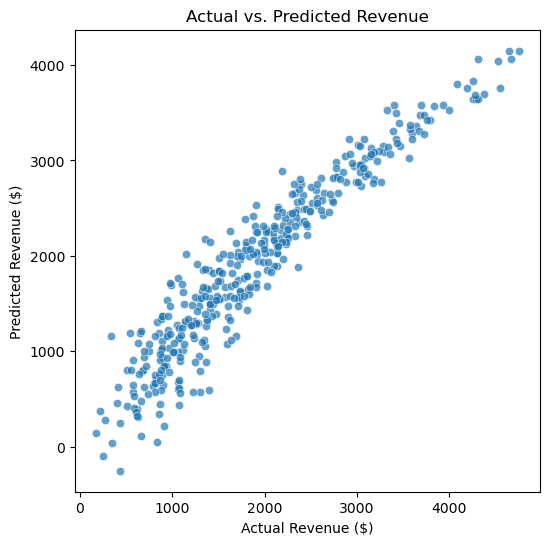

In [97]:
# Compare actual vs predicted values
results = pd.DataFrame({"Actual Revenue": y_test, "Predicted Revenue": y_pred})
print(results.head(10))  # Display first 10 predictions

# Scatter plot: Actual vs. Predicted Revenue
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Revenue ($)")
plt.ylabel("Predicted Revenue ($)")
plt.title("Actual vs. Predicted Revenue")
plt.show()